In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hypertools as hyp

plt.style.use('ggplot')

%matplotlib inline

In [2]:
x = np.random.randint(1, 10, (100, 3))
y = np.random.randint(0, 5, (100,))

In [3]:
x.shape, y.shape

((100, 3), (100,))

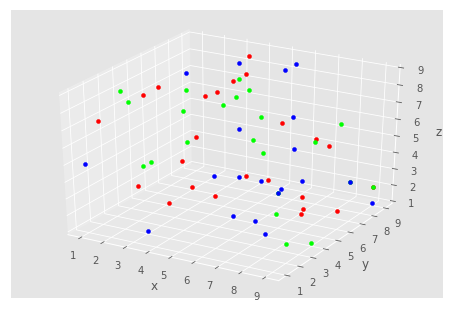

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# 乱数を100個生成(x, y, z)
# 3Dでプロット
fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x[y == 0, 0], x[y == 0, 1], x[y == 0, 2], "o", color="#ff0000", ms=4, mew=0.5)
ax.plot(x[y == 1, 0], x[y ==1, 1], x[y == 1, 2], "o", color="#00ff00", ms=4, mew=0.5)
ax.plot(x[y == 2, 0], x[y ==2, 1], x[y == 2, 2], "o", color="#0000ff", ms=4, mew=0.5)
# 軸ラベル
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# 表示
plt.show()

<IPython.core.display.Javascript object>


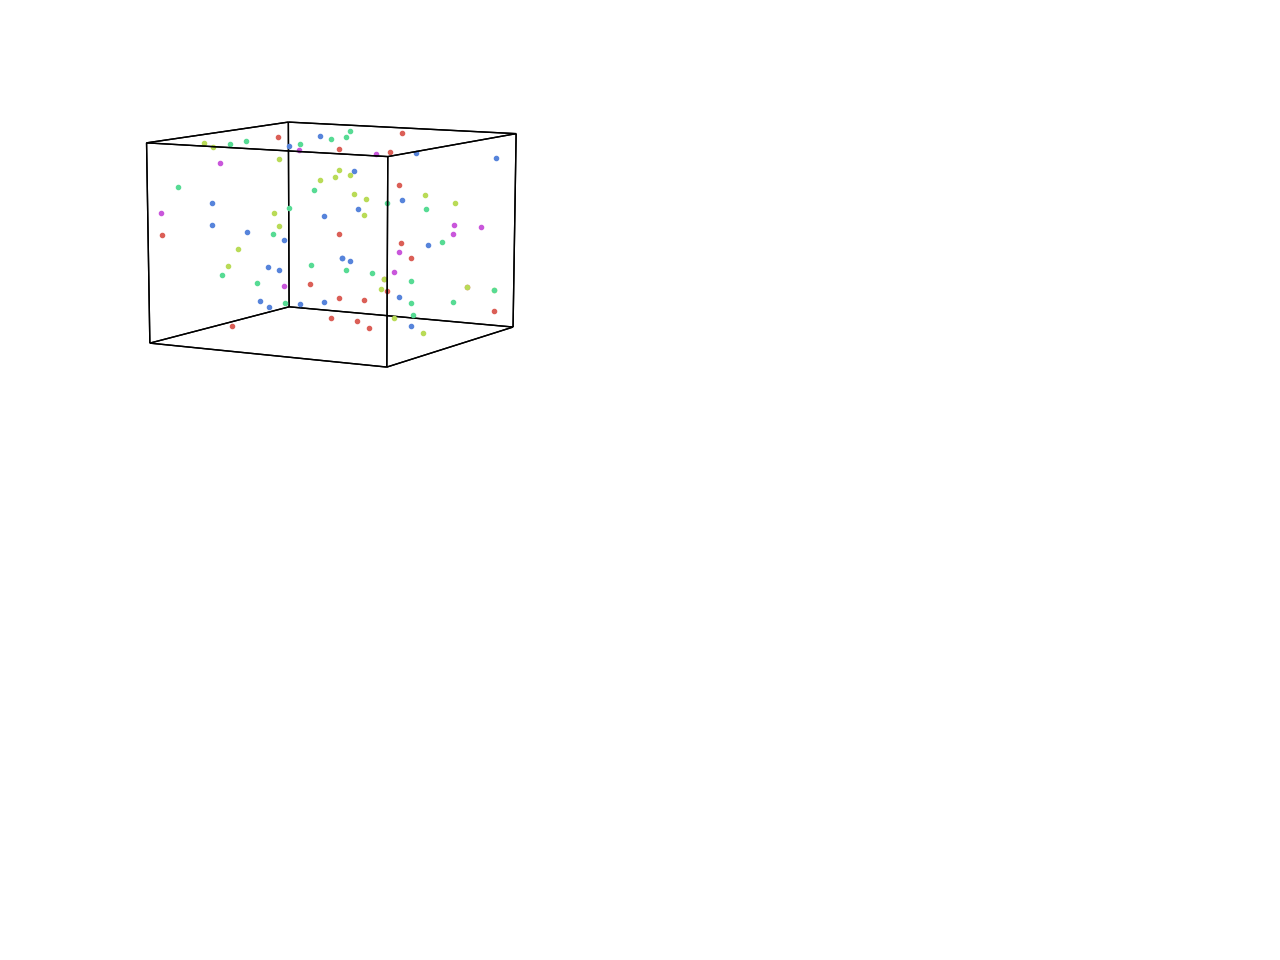

In [5]:
%matplotlib notebook
hyp.plot(x, '.', hue=y)

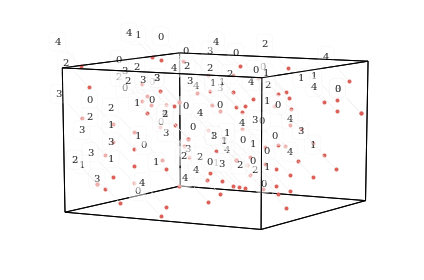

In [37]:
%matplotlib inline
hyp.plot(x, '.',  labels=y)

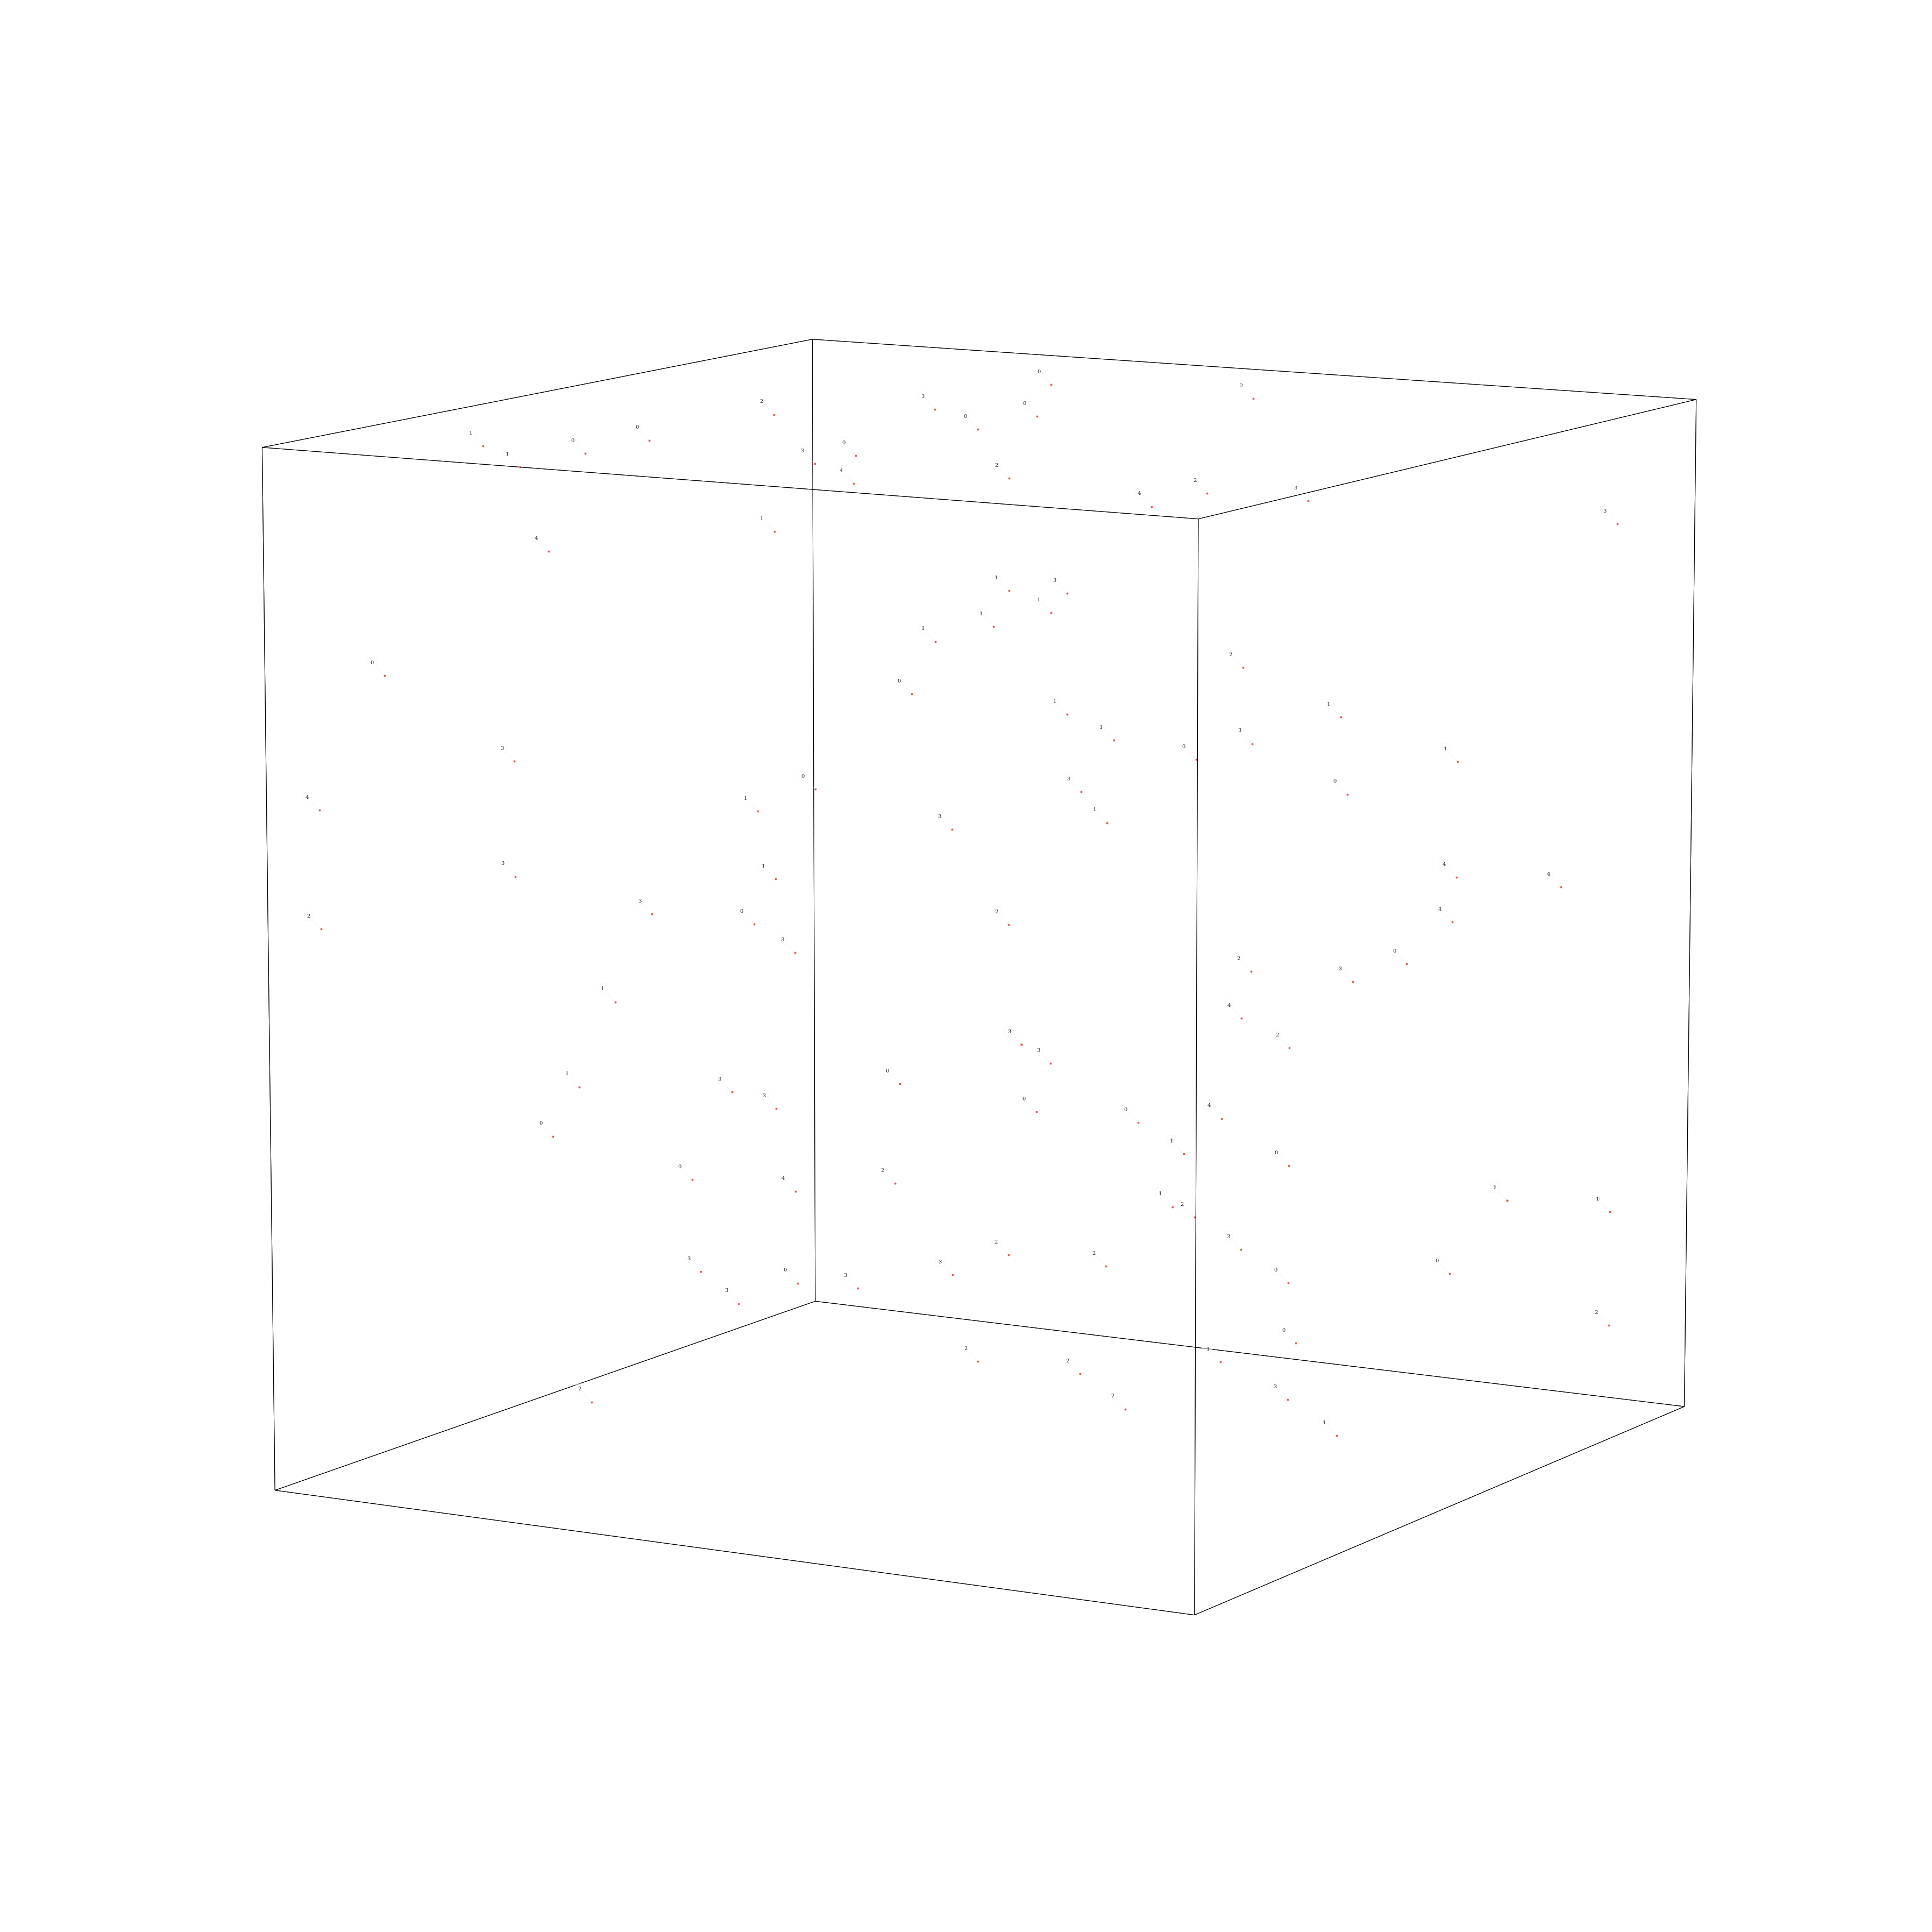

In [6]:
%matplotlib inline
hyp.plot(x, '.',  labels=y, size=[50, 50])

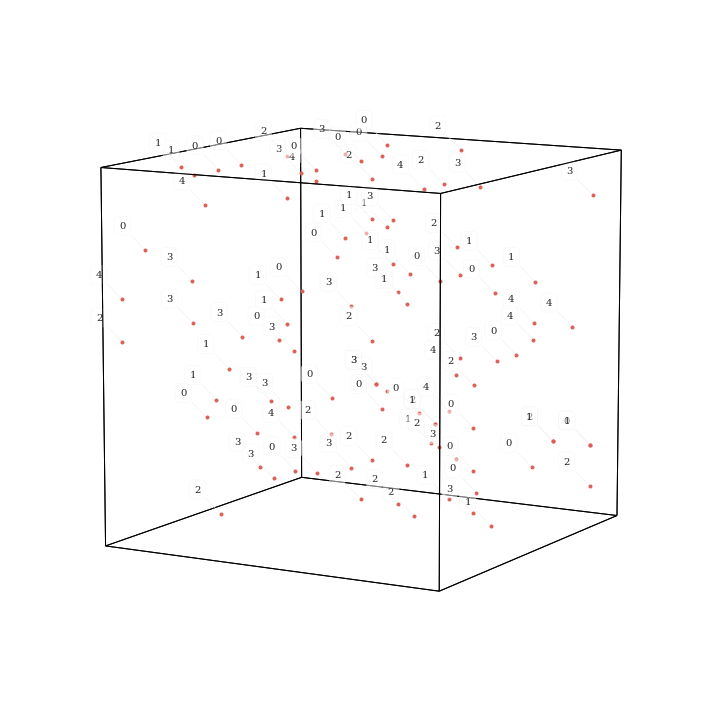

In [7]:
%matplotlib inline
hyp.plot(x, '.',  labels=y, size=[10, 10])

<IPython.core.display.Javascript object>


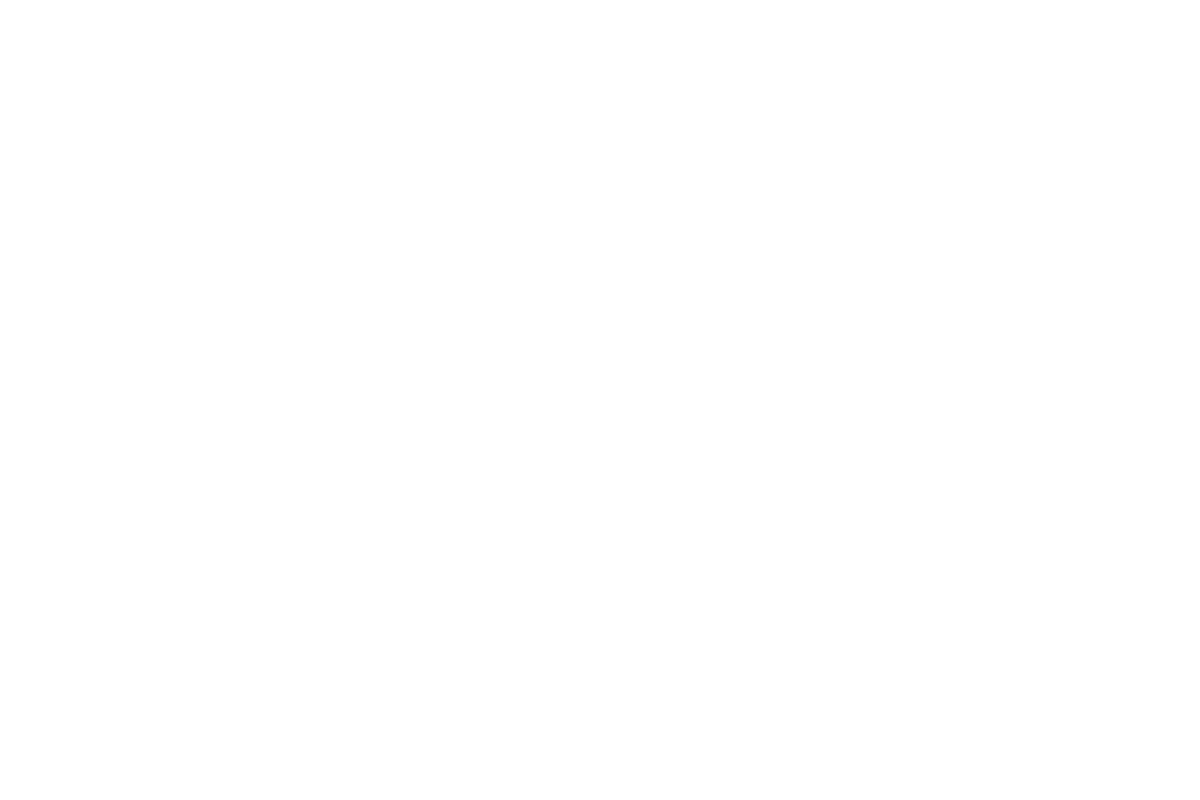

<IPython.core.display.Javascript object>


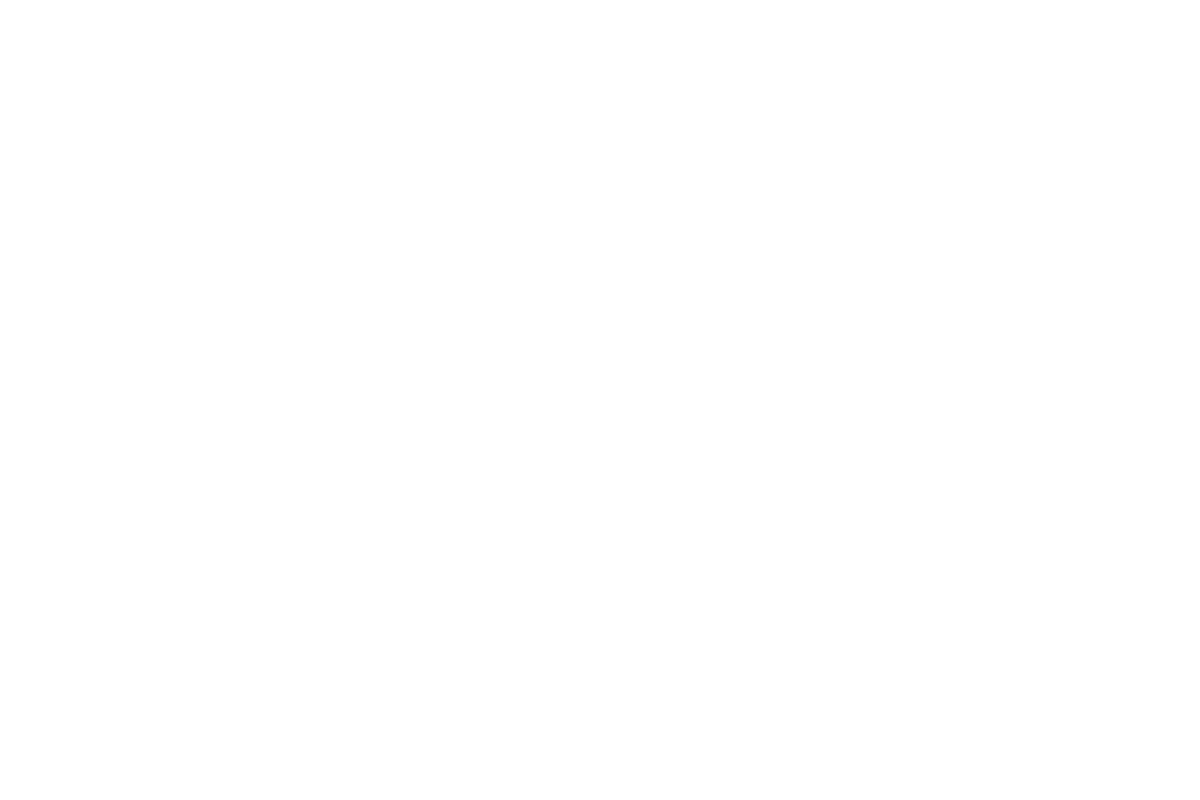

In [8]:
%matplotlib notebook
hyp.plot(x, '.', hue=y, legend=[0, 1, 2, 3, 4], show=True)

<IPython.core.display.Javascript object>


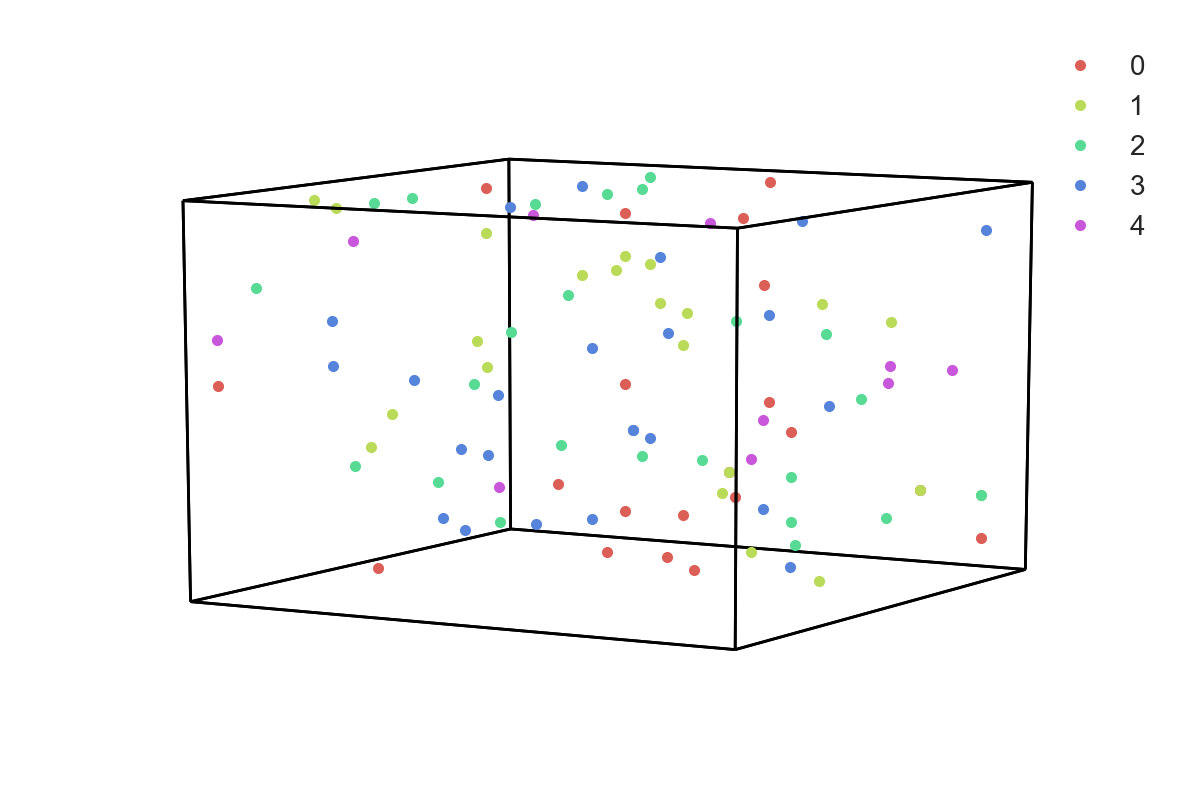

In [9]:
%matplotlib notebook
hyp.plot(x, '.', hue=y, legend=[0, 1, 2, 3, 4], show=True)

In [10]:
# 遊ぶ

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
digits = load_digits()

In [14]:
digits.data.shape

(1797, 64)

In [15]:
digits.data[0].reshape(8, 8).shape

(8, 8)

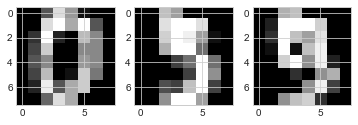

In [16]:
%matplotlib inline

plt.subplot(1, 3, 1)
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(digits.data[5].reshape(8, 8), cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(digits.data[9].reshape(8, 8), cmap='gray')
plt.show()

In [17]:
digits.target[[0, 5, 9]]

array([0, 5, 9])

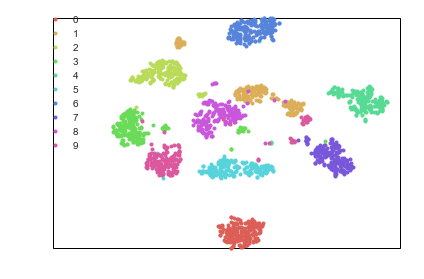

In [18]:
%matplotlib inline
hyp.plot(digits.data, '.', reduce='TSNE', hue=digits.target, legend=list(range(10)), ndims=2)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=71)

In [20]:
X_train.shape, X_test.shape

((1437, 64), (360, 64))

In [21]:
# 学習
model = RandomForestClassifier(n_estimators=1000, max_depth=8, min_samples_split=10,
                                                         min_samples_leaf=10, criterion='gini', random_state=71, n_jobs=-1)

In [22]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=71, verbose=0, warm_start=False)

In [23]:
print(classification_report(y_train, model.predict(X_train)))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       146
          1       0.99      0.98      0.99       133
          2       0.99      0.98      0.99       139
          3       0.98      0.97      0.98       149
          4       0.97      0.97      0.97       136
          5       0.98      0.97      0.98       145
          6       1.00      0.99      0.99       151
          7       0.93      1.00      0.96       150
          8       0.97      0.98      0.97       141
          9       0.96      0.93      0.95       147

avg / total       0.98      0.98      0.98      1437



In [24]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98        32
          1       0.96      0.96      0.96        49
          2       0.95      0.97      0.96        38
          3       1.00      0.91      0.95        34
          4       0.96      1.00      0.98        45
          5       0.90      0.97      0.94        37
          6       0.97      0.97      0.97        30
          7       1.00      0.97      0.98        29
          8       0.97      0.88      0.92        33
          9       0.94      0.94      0.94        33

avg / total       0.96      0.96      0.96       360



<IPython.core.display.Javascript object>


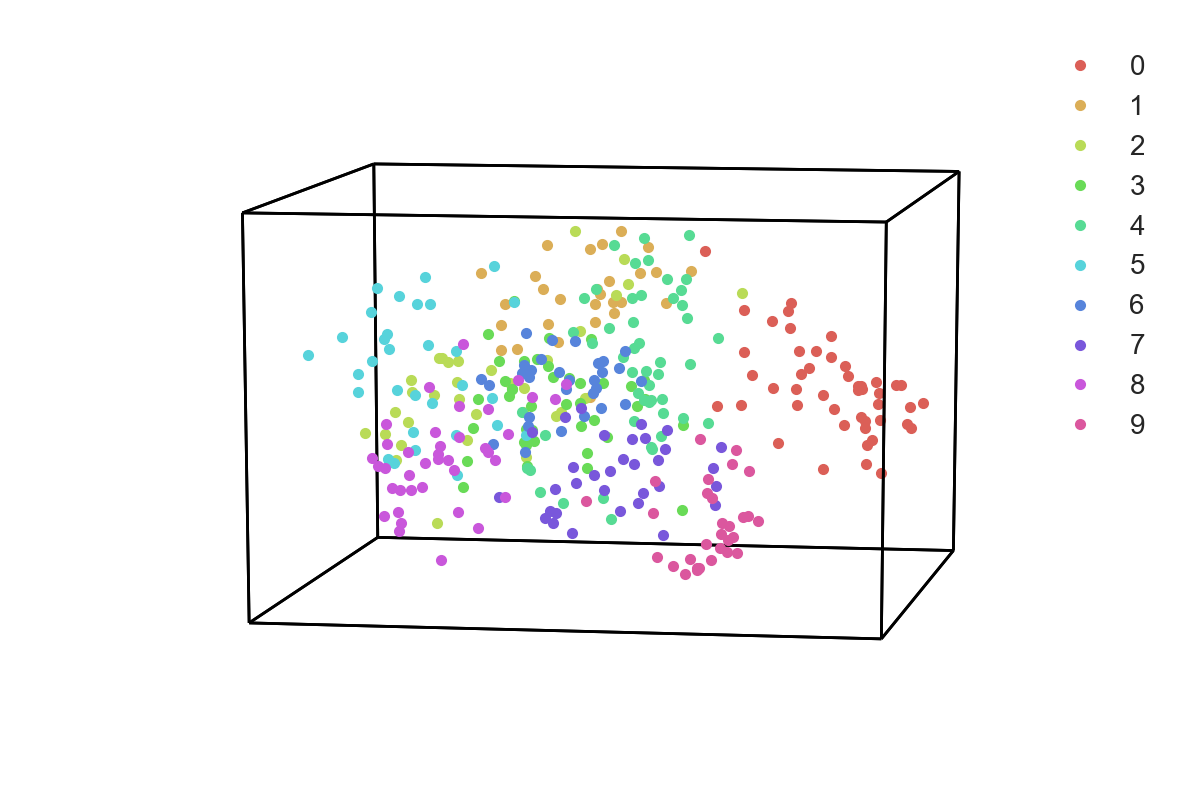

In [26]:
%matplotlib notebook
hyp.plot(X_test, '.', hue=model.predict(X_test), legend=list(range(10)), show=True)